In [39]:
import seaborn as sns
import matplotlib.patheffects as pe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('example.csv', index_col=False) 
print(data.head(10))
# print(data['PCZ'])

     plant_id  PCZ  rep  day  plant_height  plant_length  total_area    volumn
0    WT_0ml_2    0    2   10      10.32240       6.04022    13.01800  23.43990
1    WT_0ml_3    0    3   10      11.52250       9.02912    16.74250  43.27180
2    WT_0ml_4    0    4   10      10.77000       6.21550    13.85210  28.30070
3    WT_0ml_5    0    5   10       8.90108       5.38521    12.00360  22.09210
4    WT_0ml_6    0    6   10      10.98130       6.79815    14.38280  28.99530
5  WT_100ml_1  100    1   10       6.72684       2.61690     5.63217   6.28359
6  WT_100ml_2  100    2   10      10.20630       5.95671    13.61550  28.29460
7  WT_100ml_3  100    3   10      11.51190       7.58724    16.99740  37.85330
8  WT_100ml_4  100    4   10       8.12461       7.85803    13.30280  28.49620
9  WT_100ml_5  100    5   10       9.72888       3.94029    14.83000  18.12220


     plant_id  PCZ  rep  day  plant_height  plant_length  total_area    volumn
0    WT_0ml_2    0    2   10       10.3224       6.04022     13.0180   23.4399
26   WT_0ml_2    0    2   11       13.7085       9.15881     18.8433   44.3991
52   WT_0ml_2    0    2   12       14.7071      13.85640     24.3166   86.2139
78   WT_0ml_2    0    2   13       17.5404      18.91640     37.8198  193.9290
104  WT_0ml_2    0    2   14       20.7768      21.03010     47.6403  378.8710


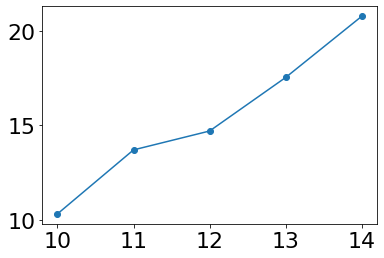

In [43]:
pczdata = data[data['PCZ'] == 0]
pczdatarep = pczdata[pczdata['rep'] == 2]
pczdatarep = pczdatarep[pczdatarep['plant_id'] == 'WT_0ml_2']
print(pczdatarep)
plt.scatter(pczdatarep['day'], pczdatarep['plant_height'])
plt.plot(pczdatarep['day'], pczdatarep['plant_height'])
plt.savefig("test.png")

5


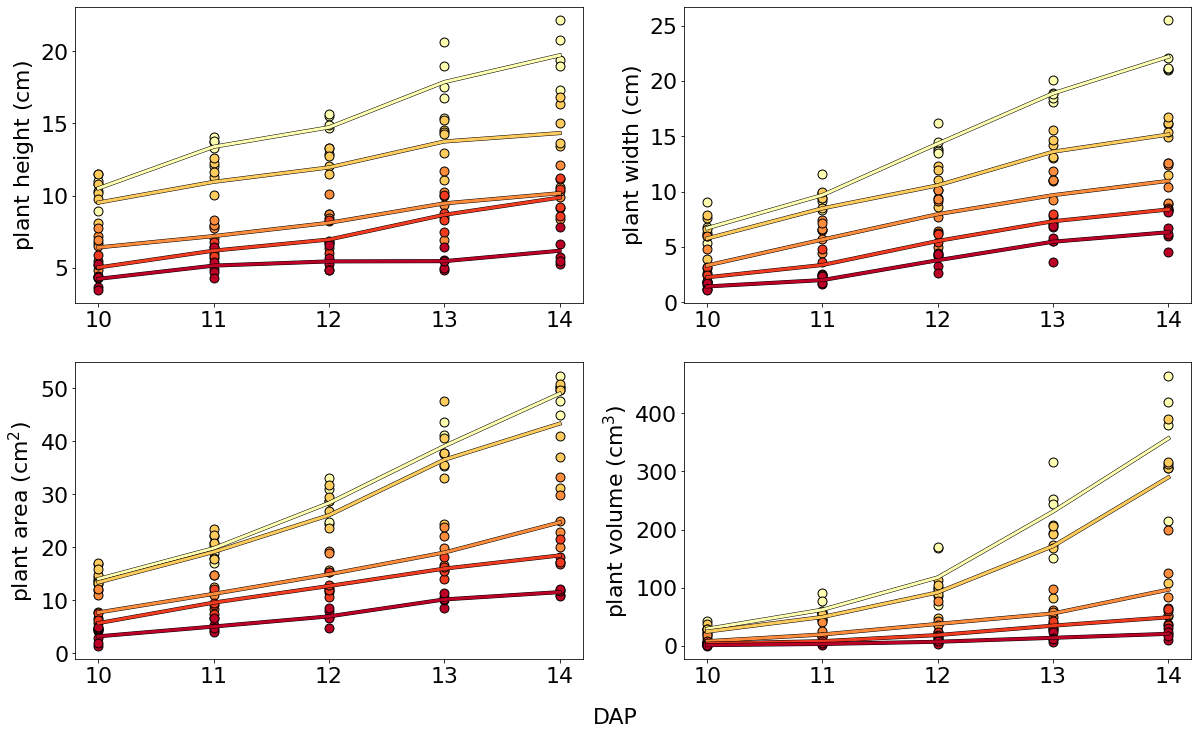

In [35]:
viridiscolor=['#ffffb2',
            '#fecc5c',
            '#fd8d3c',
            '#f03b20',
            '#bd0026']

PCZ = data['PCZ'].unique()
PCZ = np.sort(PCZ)

fig, ax = plt.subplots(2, 2,figsize=(20, 12))
fig.text(0.5, 0.05, 'DAP', ha='center')

row_index = 0
col_index = 0 #for figure col

scatter_size = 80
linewidth = 3
line_edge_width = 4
x_offset=10
for trait in ['plant_height','plant_length','total_area','volumn']: #total_area
    c=0
    for p in PCZ:
        pczdata = data[data['PCZ'] == p]
        rep = np.sort(pczdata['rep'].unique())

        mdata = np.zeros([len(rep),np.max(pczdata['day'])+1])

        for r in range(len(rep)):
            l = "WT_"+str(p)+"_"+str(rep[r])

            gtwr = pczdata[pczdata['rep'] == rep[r]]
            day=gtwr['day'].unique()
            day=np.sort(day)
            array_y=[]
            array_x=[]

            #append ith day's area to the array and the matrix
            for d in day:
                gtwrd=gtwr[gtwr['day']==d]
                value = float(gtwrd[trait])
                array_y.append(value)
                array_x.append(d)
                mdata[r][d] = value
            mdata[mdata == 0] = 'nan'
            ax[row_index, col_index].scatter(array_x, array_y, color=viridiscolor[c],s =scatter_size, edgecolors='black')
        ax[row_index, col_index].plot((np.nanmean(mdata, axis = 0)),color=viridiscolor[c], label = str(p), linewidth=linewidth,
                                     path_effects=[pe.Stroke(linewidth=line_edge_width, foreground='black'), pe.Normal()])
        c = c+1
    
    col_index = col_index+1
    if col_index is 2:
        col_index = 0
        row_index = row_index+1


data = pd.read_csv('leaf3length.csv', index_col=False) 
print(len(data))


ax[0, 0].set_ylabel("plant height ($\mathregular{cm}$)")
ax[0, 1].set_ylabel("plant width ($\mathregular{cm}$)")
ax[1, 0].set_ylabel("plant area ($\mathregular{cm^{2}}$)")
ax[1, 1].set_ylabel("plant volume ($\mathregular{cm^{3}}$)")
# ax[row_index, col_index].set_xlabel('DAP')
plt.rcParams.update({'font.size': 22})
plt.show()
